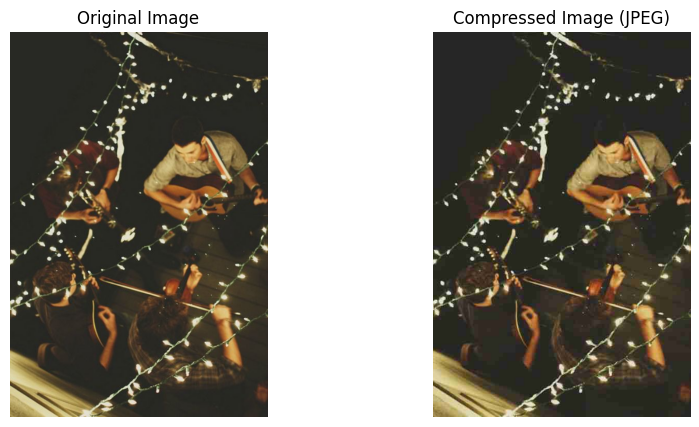

In [ ]:
# 1.1 Lossy Compression (JPEG)
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
# Load an image
image_path = "/content/Pinterest Pin (1).jpeg"
image = Image.open(image_path)
# Save as JPEG with compression
jpeg_path = "compressed_image.jpg"
image.save(jpeg_path, "JPEG", quality=20)  # Lower quality means higher compression

# Display the original and compressed images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

compressed_image = Image.open(jpeg_path)
axes[1].imshow(compressed_image)
axes[1].set_title("Compressed Image (JPEG)")
axes[1].axis("off")
plt.show()


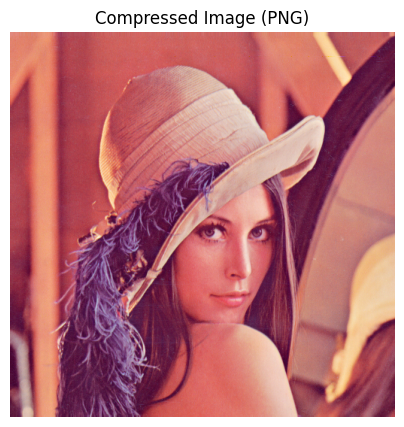

In [ ]:
# 1.2 Lossless Compression (PNG)
image_path = "/content/Lena_Image.png"
image = Image.open(image_path)

png_path = "compressed_image.png"
image.save(png_path, "PNG", optimize=True)
compressed_image_png = Image.open(png_path)

# Display the lossless compressed image
plt.figure(figsize=(5, 5))
plt.imshow(compressed_image_png)
plt.title("Compressed Image (PNG)")
plt.axis("off")
plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 94s 48ms/step - accuracy: 0.9083 - loss: 0.2933 - val_accuracy: 0.9850 - val_loss: 0.0450
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 38ms/step - accuracy: 0.9867 - loss: 0.0422 - val_accuracy: 0.9871 - val_loss: 0.0369
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 35ms/step - accuracy: 0.9910 - loss: 0.0277 - val_accuracy: 0.9892 - val_loss: 0.0341
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.9939 - loss: 0.0192 - val_accuracy: 0.9895 - val_loss: 0.0348
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 33ms/step - accuracy: 0.9953 - loss: 0.0149 - val_accuracy: 0.9912 - val_loss: 0.0295
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.9

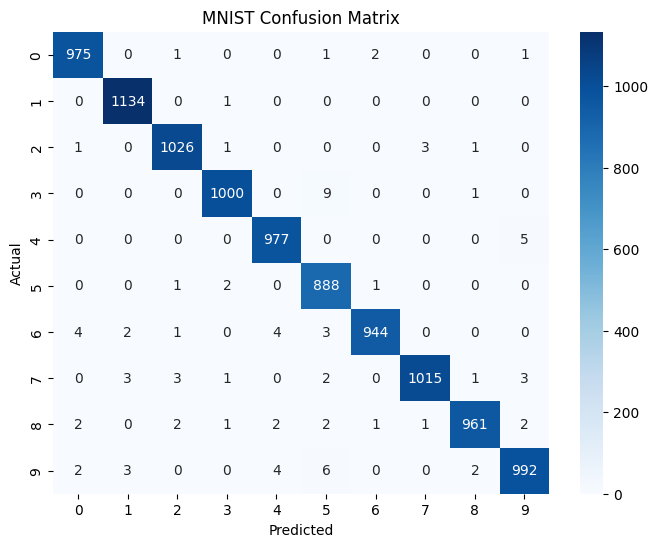

In [ ]:
# Task 2: CNN on MNIST & CIFAR-10
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

# Load MNIST Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize

# Expand dimensions
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Build CNN Model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate the model
y_pred = model.predict(x_test).argmax(axis=1)
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("MNIST Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.4044 - loss: 1.6415 - val_accuracy: 0.5788 - val_loss: 1.1901
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.6219 - loss: 1.0719 - val_accuracy: 0.6580 - val_loss: 0.9879
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.6813 - loss: 0.9123 - val_accuracy: 0.6662 - val_loss: 0.9492
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.7265 - loss: 0.7901 - val_accuracy: 0.6785 - val_loss: 0.9240
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 49ms/step - accuracy: 0.7597 - loss: 0.6932 - val_accuracy: 0.6933 - val_loss: 0.9038
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
              precision    recall  f1-score   support

           0       0.79      0.64      0.71      1000
           1       0.83      0.82      0.83      1000
           2       0.54      0.65      0.59      1000
           3       0.58      0.41      0.48      1000
           4       0.59      0.6

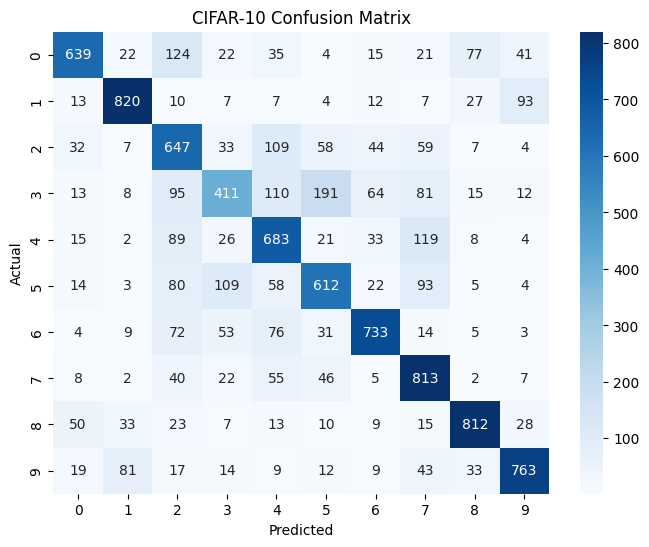

In [ ]:
# Load CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build CNN Model for CIFAR-10
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate on CIFAR-10
y_pred = model.predict(x_test).argmax(axis=1)
print(classification_report(y_test, y_pred))

# Confusion Matrix for CIFAR-10
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("CIFAR-10 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
